In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from collections import Counter
import numpy as np

overall NER frequencies barplot

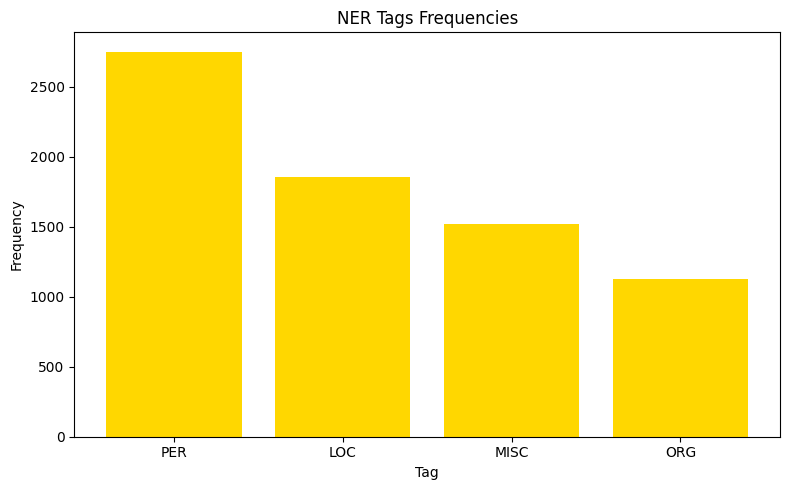

In [13]:

df = pd.read_csv("output_test_with_preds.csv")

def extract_entity_counts(df):
    all_entities = []
    for row in df['A_raw_entities']:
        try:
            entities = ast.literal_eval(row)
            for ent in entities:
                if 'entity' in ent:
                    all_entities.append(ent['entity'])
        except Exception:
            continue
    return Counter(all_entities)

entity_counts = extract_entity_counts(df)

tags = ['PER', 'LOC', 'MISC', 'ORG']
values = [entity_counts.get(tag, 0) for tag in tags]
plt.figure(figsize=(8, 5))
plt.bar(tags, values, color='gold')
plt.title('NER Tags Frequencies')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

NER tags in errors barplot

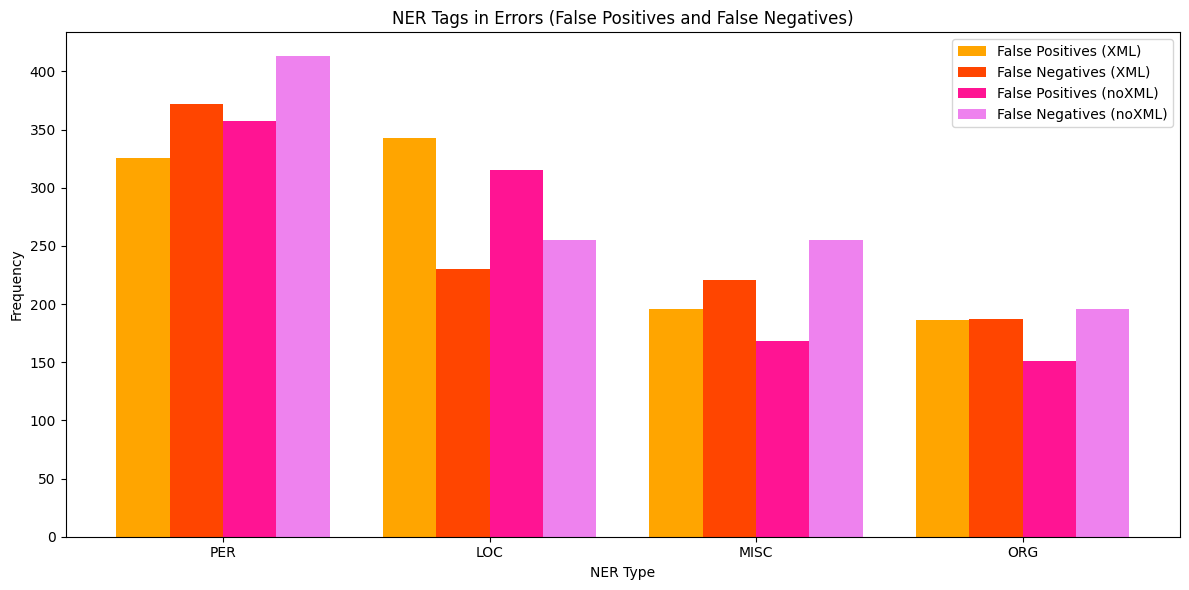

In [14]:

df_xml = pd.read_csv("output_test_with_preds.csv")
df_noxml = pd.read_csv("output_test_with_preds_noxml.csv")

tags = ["PER", "LOC", "MISC", "ORG"]

def extract_fp_fn_tags(df, tag_list, fp=True):
    if fp:
        condition = (df["label_binary"] == 0) & (df["prediction"] == 1)
    else:
        condition = (df["label_binary"] == 1) & (df["prediction"] == 0)

    tags_total = []
    for val in df[condition]["A_raw_entities"].dropna():
        items = [t.strip("{} ").split(":")[-1].strip() for t in val.strip("[]").replace("'", "").split(", ")]
        tags_total.extend([tag for tag in items if tag in tag_list])
    
    return pd.Series(tags_total).value_counts().reindex(tag_list, fill_value=0)

fp_xml = extract_fp_fn_tags(df_xml, tags, fp=True)
fn_xml = extract_fp_fn_tags(df_xml, tags, fp=False)
fp_noxml = extract_fp_fn_tags(df_noxml, tags, fp=True)
fn_noxml = extract_fp_fn_tags(df_noxml, tags, fp=False)

x = np.arange(len(tags))
width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, fp_xml.values, width, label="False Positives (XML)", color="orange")
plt.bar(x - 0.5*width, fn_xml.values, width, label="False Negatives (XML)", color="orangered")
plt.bar(x + 0.5*width, fp_noxml.values, width, label="False Positives (noXML)", color="deeppink")
plt.bar(x + 1.5*width, fn_noxml.values, width, label="False Negatives (noXML)", color="violet")
plt.xticks(x, tags)
plt.ylabel("Frequency")
plt.xlabel("NER Type")
plt.title("NER Tags in Errors (False Positives and False Negatives)")
plt.legend()
plt.tight_layout()
plt.show()
